In [1]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def check_range(val):
    if val < 0: val = 0
    elif val > 255: val = 255
    return int(val)

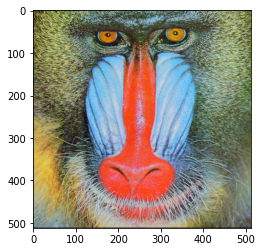

In [3]:
src_img = Image.open("4.2.03.tiff")
plt.imshow(src_img)

In [4]:
width, height = src_img.size
width, height

(512, 512)

In [5]:
dst_img = Image.new("RGB", (width, height))

In [15]:
# 平滑化オペレータ
f = [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]
f

[0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111]

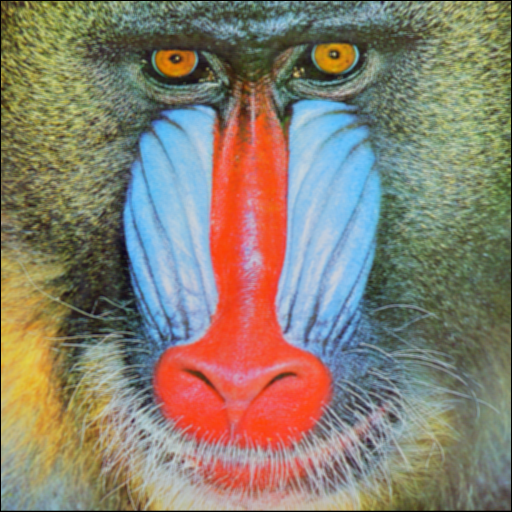

In [16]:
pixels = np.array(src_img)
p = np.zeros((9, 3))
for y in range(1, height - 1):
    for x in range(1, width - 1):
        p[0] = pixels[y - 1][x - 1]
        p[1] = pixels[y + 0][x - 1]
        p[2] = pixels[y + 1][x - 1]
        p[3] = pixels[y - 1][x + 0]
        p[4] = pixels[y + 0][x + 0]
        p[5] = pixels[y + 1][x + 0]
        p[6] = pixels[y - 1][x + 1]
        p[7] = pixels[y + 0][x + 1]
        p[8] = pixels[y + 1][x + 1]
        
        # conv
        for i in range(9):
            p[i] = p[i] * f[i]
        color = np.sum(p, 0)
        
        # detect color
        r, g, b = map(check_range, color)
        
        dst_img.putpixel((x, y), (r, g, b, 255))
dst_img

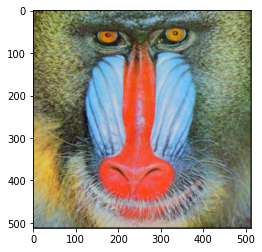

In [17]:
plt.figure()
plt.imshow(dst_img)
plt.show()